In [2]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')

from models import Asso
import pandas as pd

### Generate Boolean matrix

[I] m            : 1000
[I] n            : 500
[I] k            : 5
[I] overlap_flag : False
[I] size_range   : [0.25 0.75 0.25 1.  ]
[I] seed         : 1234
[I] noise        : [0.4  0.02]
[I] seed         : 1024
[I] Using RandomState.
(1000, 5)
(5, 500)
(1000, 500)


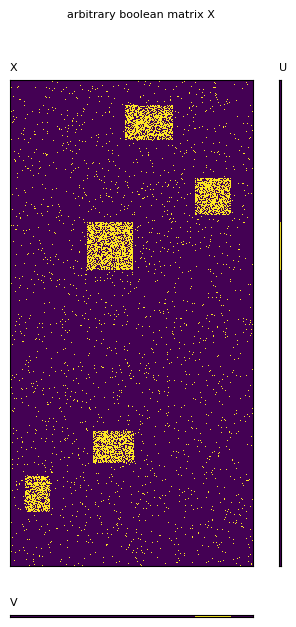

In [3]:
# generate arbitrary Boolean matrix (X)

from generators import DiagBooleanMatrix, ArbiBooleanMatrix

n_row=1000
n_col=500
k=5
overlap_flag=True
noise=[0.4, 0.02]
size_range=[0.25, 0.75, 0.25, 1.0]

X = ArbiBooleanMatrix(m=n_row, n=n_col, k=k, overlap_flag=False, size_range=size_range)
X.generate(seed=1234) # if no seed assigned, use time instead
X.add_noise(noise=noise, seed=1024)
X.show_matrix(scaling=0.2, title='arbitrary boolean matrix X')

## III. Prediction task with k-Fold Cross-Validation

Assume we have k and tau, now we optimize over w.

In [4]:
from datasets import CrossValidation

X_split = CrossValidation(X=X.X, test_size=0.2, n_folds=5, seed=1997)
X_split.negative_sample(train_val_size=X_split.pos_train_val_size, 
                        test_size=X_split.pos_test_size, 
                        seed=2023, type='popularity')

[I] CrossValidation, sampling positives
[I]   seed         : 1997
[I]   n_folds      : 5
[I]   partition    : [0, 4501, 9002, 13503, 18003, 22503]
[I]   train + val  : 22503
[I]   test_size    : 5626
[I] CrossValidation, sampling negatives
[I]   seed         : 2023
[I]   n_folds      : 5
[I]   partition    : [0, 4501, 9002, 13503, 18003, 22503]
[I]   train + val  : 22503
[I]   test_size    : 5626


In [5]:
# empty table
from utils import add_log
metrics = ['Recall', 'Precsion', 'Error', 'Accuracy', 'F1']
columns = ['time', 'k', 'tau', 'p_pos', 'p_neg'] + metrics
df_prediction_val = pd.DataFrame(columns=columns)
df_prediction_test = pd.DataFrame(columns=columns)

In [6]:
# grid search, apply best

n_fold = 5

k = 5
tau = 0.10
w_list = [[0.6, 0.4], [0.7, 0.3], [0.8, 0.2], [0.9, 0.1]]

for w in w_list:

    for i in range(n_fold):
        # get current fold
        current_fold = i + 1
        X_data = X_split.get_fold(current_fold=current_fold)
        X_train, X_val, X_test = X_split.X_train, X_split.X_val, X_split.X_test

        
        asso = Asso(k=k, tau=tau, w=w)
        asso.fit(X_train, display=False)

        results = asso.eval(X_val, metrics=metrics, task='prediction')
        add_log(df_prediction_val, [pd.Timestamp.now(), k, tau, w[0], w[1]] + results)

        # just to illustrate the accuracy gap between val and test
        results = asso.eval(X_test, metrics=metrics, task='prediction')
        add_log(df_prediction_test, [pd.Timestamp.now(), k, tau, w[0], w[1]] + results)

[I] CrossValidation, current fold : 1
[I] CrossValidation, get indices for current fold
[I]   current fold         : 1
[I]   current train size   : 18002
[I]   current val size     : 4501
[I]   fold size            : (18002, 4501, 5626)
[I] CrossValidation, get indices for current fold
[I]   current fold         : 1
[I]   current train size   : 18002
[I]   current val size     : 4501
[I]   fold neg sample size : (18002, 4501, 5626)
[I] k            : 5
[I] tau          : 0.1
[I] weights      : [0.6, 0.4]
[I] display : False
[W] Missing validation data.


c:\Users\hongtuonie\Anaconda3\envs\cornac\lib\site-packages\scipy\sparse\_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


[I] display : False


100%|██████████| 5/5 [00:18<00:00,  3.64s/it]


,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
0,2023-12-06 19:50:27.707527,5,0.1,0.6,0.4,0.216174,0.864889,0.408798,0.591202,0.345894


,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
0,2023-12-06 19:50:29.722716,5,0.1,0.6,0.4,0.227515,0.860794,0.404639,0.595361,0.359904


[I] CrossValidation, current fold : 2
[I] CrossValidation, get indices for current fold
[I]   current fold         : 2
[I]   current train size   : 18002
[I]   current val size     : 4501
[I]   fold size            : (18002, 4501, 5626)
[I] CrossValidation, get indices for current fold
[I]   current fold         : 2
[I]   current train size   : 18002
[I]   current val size     : 4501
[I]   fold neg sample size : (18002, 4501, 5626)
[I] k            : 5
[I] tau          : 0.1
[I] weights      : [0.6, 0.4]
[I] display : False
[W] Missing validation data.


c:\Users\hongtuonie\Anaconda3\envs\cornac\lib\site-packages\scipy\sparse\_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


[I] display : False


100%|██████████| 5/5 [00:18<00:00,  3.73s/it]


,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
0,2023-12-06 19:50:27.707527,5,0.1,0.6,0.4,0.216174,0.864889,0.408798,0.591202,0.345894
1,2023-12-06 19:50:50.193676,5,0.1,0.6,0.4,0.242168,0.867834,0.397356,0.602644,0.378669


,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
0,2023-12-06 19:50:29.722716,5,0.1,0.6,0.4,0.227515,0.860794,0.404639,0.595361,0.359904
1,2023-12-06 19:50:52.192873,5,0.1,0.6,0.4,0.237824,0.871094,0.398685,0.601315,0.373639


[I] CrossValidation, current fold : 3
[I] CrossValidation, get indices for current fold
[I]   current fold         : 3
[I]   current train size   : 18002
[I]   current val size     : 4501
[I]   fold size            : (18002, 4501, 5626)
[I] CrossValidation, get indices for current fold
[I]   current fold         : 3
[I]   current train size   : 18002
[I]   current val size     : 4501
[I]   fold neg sample size : (18002, 4501, 5626)
[I] k            : 5
[I] tau          : 0.1
[I] weights      : [0.6, 0.4]
[I] display : False
[W] Missing validation data.


c:\Users\hongtuonie\Anaconda3\envs\cornac\lib\site-packages\scipy\sparse\_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


[I] display : False


100%|██████████| 5/5 [00:18<00:00,  3.69s/it]


,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
0,2023-12-06 19:50:27.707527,5,0.1,0.6,0.4,0.216174,0.864889,0.408798,0.591202,0.345894
1,2023-12-06 19:50:50.193676,5,0.1,0.6,0.4,0.242168,0.867834,0.397356,0.602644,0.378669
2,2023-12-06 19:51:12.518549,5,0.1,0.6,0.4,0.213730,0.889917,0.406354,0.593646,0.344679


,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
0,2023-12-06 19:50:29.722716,5,0.1,0.6,0.4,0.227515,0.860794,0.404639,0.595361,0.359904
1,2023-12-06 19:50:52.192873,5,0.1,0.6,0.4,0.237824,0.871094,0.398685,0.601315,0.373639
2,2023-12-06 19:51:14.497898,5,0.1,0.6,0.4,0.223427,0.865702,0.405617,0.594383,0.355185


[I] CrossValidation, current fold : 4
[I] CrossValidation, get indices for current fold
[I]   current fold         : 4
[I]   current train size   : 18003
[I]   current val size     : 4500
[I]   fold size            : (18003, 4500, 5626)
[I] CrossValidation, get indices for current fold
[I]   current fold         : 4
[I]   current train size   : 18003
[I]   current val size     : 4500
[I]   fold neg sample size : (18003, 4500, 5626)
[I] k            : 5
[I] tau          : 0.1
[I] weights      : [0.6, 0.4]
[I] display : False
[W] Missing validation data.


c:\Users\hongtuonie\Anaconda3\envs\cornac\lib\site-packages\scipy\sparse\_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


[I] display : False


100%|██████████| 5/5 [00:18<00:00,  3.62s/it]


,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
0,2023-12-06 19:50:27.707527,5,0.1,0.6,0.4,0.216174,0.864889,0.408798,0.591202,0.345894
1,2023-12-06 19:50:50.193676,5,0.1,0.6,0.4,0.242168,0.867834,0.397356,0.602644,0.378669
2,2023-12-06 19:51:12.518549,5,0.1,0.6,0.4,0.213730,0.889917,0.406354,0.593646,0.344679
3,2023-12-06 19:51:34.513894,5,0.1,0.6,0.4,0.189111,0.881865,0.418111,0.581889,0.311436


,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
0,2023-12-06 19:50:29.722716,5,0.1,0.6,0.4,0.227515,0.860794,0.404639,0.595361,0.359904
1,2023-12-06 19:50:52.192873,5,0.1,0.6,0.4,0.237824,0.871094,0.398685,0.601315,0.373639
2,2023-12-06 19:51:14.497898,5,0.1,0.6,0.4,0.223427,0.865702,0.405617,0.594383,0.355185
3,2023-12-06 19:51:36.695469,5,0.1,0.6,0.4,0.191610,0.876423,0.417704,0.582296,0.314469


[I] CrossValidation, current fold : 5
[I] CrossValidation, get indices for current fold
[I]   current fold         : 5
[I]   current train size   : 18003
[I]   current val size     : 4500
[I]   fold size            : (18003, 4500, 5626)
[I] CrossValidation, get indices for current fold
[I]   current fold         : 5
[I]   current train size   : 18003
[I]   current val size     : 4500
[I]   fold neg sample size : (18003, 4500, 5626)
[I] k            : 5
[I] tau          : 0.1
[I] weights      : [0.6, 0.4]
[I] display : False
[W] Missing validation data.


c:\Users\hongtuonie\Anaconda3\envs\cornac\lib\site-packages\scipy\sparse\_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


[I] display : False


100%|██████████| 5/5 [00:20<00:00,  4.10s/it]


,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
0,2023-12-06 19:50:27.707527,5,0.1,0.6,0.4,0.216174,0.864889,0.408798,0.591202,0.345894
1,2023-12-06 19:50:50.193676,5,0.1,0.6,0.4,0.242168,0.867834,0.397356,0.602644,0.378669
2,2023-12-06 19:51:12.518549,5,0.1,0.6,0.4,0.213730,0.889917,0.406354,0.593646,0.344679
3,2023-12-06 19:51:34.513894,5,0.1,0.6,0.4,0.189111,0.881865,0.418111,0.581889,0.311436
4,2023-12-06 19:51:59.014607,5,0.1,0.6,0.4,0.230000,0.863219,0.403222,0.596778,0.363222


,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
0,2023-12-06 19:50:29.722716,5,0.1,0.6,0.4,0.227515,0.860794,0.404639,0.595361,0.359904
1,2023-12-06 19:50:52.192873,5,0.1,0.6,0.4,0.237824,0.871094,0.398685,0.601315,0.373639
2,2023-12-06 19:51:14.497898,5,0.1,0.6,0.4,0.223427,0.865702,0.405617,0.594383,0.355185
3,2023-12-06 19:51:36.695469,5,0.1,0.6,0.4,0.191610,0.876423,0.417704,0.582296,0.314469
4,2023-12-06 19:52:00.980521,5,0.1,0.6,0.4,0.226093,0.862958,0.404906,0.595094,0.358310


[I] CrossValidation, current fold : 1
[I] CrossValidation, get indices for current fold
[I]   current fold         : 1
[I]   current train size   : 18002
[I]   current val size     : 4501
[I]   fold size            : (18002, 4501, 5626)
[I] CrossValidation, get indices for current fold
[I]   current fold         : 1
[I]   current train size   : 18002
[I]   current val size     : 4501
[I]   fold neg sample size : (18002, 4501, 5626)
[I] k            : 5
[I] tau          : 0.1
[I] weights      : [0.7, 0.3]
[I] display : False
[W] Missing validation data.


c:\Users\hongtuonie\Anaconda3\envs\cornac\lib\site-packages\scipy\sparse\_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


[I] display : False


100%|██████████| 5/5 [00:20<00:00,  4.10s/it]


,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
1,2023-12-06 19:50:50.193676,5,0.1,0.6,0.4,0.242168,0.867834,0.397356,0.602644,0.378669
2,2023-12-06 19:51:12.518549,5,0.1,0.6,0.4,0.213730,0.889917,0.406354,0.593646,0.344679
3,2023-12-06 19:51:34.513894,5,0.1,0.6,0.4,0.189111,0.881865,0.418111,0.581889,0.311436
4,2023-12-06 19:51:59.014607,5,0.1,0.6,0.4,0.230000,0.863219,0.403222,0.596778,0.363222
5,2023-12-06 19:52:23.286810,5,0.1,0.7,0.3,0.582982,0.866293,0.253499,0.746501,0.696946


,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
1,2023-12-06 19:50:52.192873,5,0.1,0.6,0.4,0.237824,0.871094,0.398685,0.601315,0.373639
2,2023-12-06 19:51:14.497898,5,0.1,0.6,0.4,0.223427,0.865702,0.405617,0.594383,0.355185
3,2023-12-06 19:51:36.695469,5,0.1,0.6,0.4,0.191610,0.876423,0.417704,0.582296,0.314469
4,2023-12-06 19:52:00.980521,5,0.1,0.6,0.4,0.226093,0.862958,0.404906,0.595094,0.358310
5,2023-12-06 19:52:25.243927,5,0.1,0.7,0.3,0.586740,0.865723,0.252133,0.747867,0.699438


[I] CrossValidation, current fold : 2
[I] CrossValidation, get indices for current fold
[I]   current fold         : 2
[I]   current train size   : 18002
[I]   current val size     : 4501
[I]   fold size            : (18002, 4501, 5626)
[I] CrossValidation, get indices for current fold
[I]   current fold         : 2
[I]   current train size   : 18002
[I]   current val size     : 4501
[I]   fold neg sample size : (18002, 4501, 5626)
[I] k            : 5
[I] tau          : 0.1
[I] weights      : [0.7, 0.3]
[I] display : False
[W] Missing validation data.


c:\Users\hongtuonie\Anaconda3\envs\cornac\lib\site-packages\scipy\sparse\_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


[I] display : False


100%|██████████| 5/5 [00:21<00:00,  4.22s/it]


,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
2,2023-12-06 19:51:12.518549,5,0.1,0.6,0.4,0.213730,0.889917,0.406354,0.593646,0.344679
3,2023-12-06 19:51:34.513894,5,0.1,0.6,0.4,0.189111,0.881865,0.418111,0.581889,0.311436
4,2023-12-06 19:51:59.014607,5,0.1,0.6,0.4,0.230000,0.863219,0.403222,0.596778,0.363222
5,2023-12-06 19:52:23.286810,5,0.1,0.7,0.3,0.582982,0.866293,0.253499,0.746501,0.696946
6,2023-12-06 19:52:48.273523,5,0.1,0.7,0.3,0.575428,0.867381,0.256276,0.743724,0.691866


,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
2,2023-12-06 19:51:14.497898,5,0.1,0.6,0.4,0.223427,0.865702,0.405617,0.594383,0.355185
3,2023-12-06 19:51:36.695469,5,0.1,0.6,0.4,0.191610,0.876423,0.417704,0.582296,0.314469
4,2023-12-06 19:52:00.980521,5,0.1,0.6,0.4,0.226093,0.862958,0.404906,0.595094,0.358310
5,2023-12-06 19:52:25.243927,5,0.1,0.7,0.3,0.586740,0.865723,0.252133,0.747867,0.699438
6,2023-12-06 19:52:50.255255,5,0.1,0.7,0.3,0.586562,0.868421,0.251155,0.748845,0.700191


[I] CrossValidation, current fold : 3
[I] CrossValidation, get indices for current fold
[I]   current fold         : 3
[I]   current train size   : 18002
[I]   current val size     : 4501
[I]   fold size            : (18002, 4501, 5626)
[I] CrossValidation, get indices for current fold
[I]   current fold         : 3
[I]   current train size   : 18002
[I]   current val size     : 4501
[I]   fold neg sample size : (18002, 4501, 5626)
[I] k            : 5
[I] tau          : 0.1
[I] weights      : [0.7, 0.3]
[I] display : False
[W] Missing validation data.


c:\Users\hongtuonie\Anaconda3\envs\cornac\lib\site-packages\scipy\sparse\_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


[I] display : False


100%|██████████| 5/5 [00:20<00:00,  4.10s/it]


,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
3,2023-12-06 19:51:34.513894,5,0.1,0.6,0.4,0.189111,0.881865,0.418111,0.581889,0.311436
4,2023-12-06 19:51:59.014607,5,0.1,0.6,0.4,0.230000,0.863219,0.403222,0.596778,0.363222
5,2023-12-06 19:52:23.286810,5,0.1,0.7,0.3,0.582982,0.866293,0.253499,0.746501,0.696946
6,2023-12-06 19:52:48.273523,5,0.1,0.7,0.3,0.575428,0.867381,0.256276,0.743724,0.691866
7,2023-12-06 19:53:12.640003,5,0.1,0.7,0.3,0.575872,0.878644,0.251833,0.748167,0.695746


,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
3,2023-12-06 19:51:36.695469,5,0.1,0.6,0.4,0.191610,0.876423,0.417704,0.582296,0.314469
4,2023-12-06 19:52:00.980521,5,0.1,0.6,0.4,0.226093,0.862958,0.404906,0.595094,0.358310
5,2023-12-06 19:52:25.243927,5,0.1,0.7,0.3,0.586740,0.865723,0.252133,0.747867,0.699438
6,2023-12-06 19:52:50.255255,5,0.1,0.7,0.3,0.586562,0.868421,0.251155,0.748845,0.700191
7,2023-12-06 19:53:14.691356,5,0.1,0.7,0.3,0.580164,0.873428,0.251955,0.748045,0.697212


[I] CrossValidation, current fold : 4
[I] CrossValidation, get indices for current fold
[I]   current fold         : 4
[I]   current train size   : 18003
[I]   current val size     : 4500
[I]   fold size            : (18003, 4500, 5626)
[I] CrossValidation, get indices for current fold
[I]   current fold         : 4
[I]   current train size   : 18003
[I]   current val size     : 4500
[I]   fold neg sample size : (18003, 4500, 5626)
[I] k            : 5
[I] tau          : 0.1
[I] weights      : [0.7, 0.3]
[I] display : False
[W] Missing validation data.


c:\Users\hongtuonie\Anaconda3\envs\cornac\lib\site-packages\scipy\sparse\_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


[I] display : False


100%|██████████| 5/5 [00:20<00:00,  4.02s/it]


,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
4,2023-12-06 19:51:59.014607,5,0.1,0.6,0.4,0.230000,0.863219,0.403222,0.596778,0.363222
5,2023-12-06 19:52:23.286810,5,0.1,0.7,0.3,0.582982,0.866293,0.253499,0.746501,0.696946
6,2023-12-06 19:52:48.273523,5,0.1,0.7,0.3,0.575428,0.867381,0.256276,0.743724,0.691866
7,2023-12-06 19:53:12.640003,5,0.1,0.7,0.3,0.575872,0.878644,0.251833,0.748167,0.695746
8,2023-12-06 19:53:36.645654,5,0.1,0.7,0.3,0.596000,0.870497,0.246333,0.753667,0.707558


,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
4,2023-12-06 19:52:00.980521,5,0.1,0.6,0.4,0.226093,0.862958,0.404906,0.595094,0.358310
5,2023-12-06 19:52:25.243927,5,0.1,0.7,0.3,0.586740,0.865723,0.252133,0.747867,0.699438
6,2023-12-06 19:52:50.255255,5,0.1,0.7,0.3,0.586562,0.868421,0.251155,0.748845,0.700191
7,2023-12-06 19:53:14.691356,5,0.1,0.7,0.3,0.580164,0.873428,0.251955,0.748045,0.697212
8,2023-12-06 19:53:38.544381,5,0.1,0.7,0.3,0.604159,0.867092,0.244223,0.755777,0.712131


[I] CrossValidation, current fold : 5
[I] CrossValidation, get indices for current fold
[I]   current fold         : 5
[I]   current train size   : 18003
[I]   current val size     : 4500
[I]   fold size            : (18003, 4500, 5626)
[I] CrossValidation, get indices for current fold
[I]   current fold         : 5
[I]   current train size   : 18003
[I]   current val size     : 4500
[I]   fold neg sample size : (18003, 4500, 5626)
[I] k            : 5
[I] tau          : 0.1
[I] weights      : [0.7, 0.3]
[I] display : False
[W] Missing validation data.


c:\Users\hongtuonie\Anaconda3\envs\cornac\lib\site-packages\scipy\sparse\_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


[I] display : False


100%|██████████| 5/5 [00:19<00:00,  3.94s/it]


,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
5,2023-12-06 19:52:23.286810,5,0.1,0.7,0.3,0.582982,0.866293,0.253499,0.746501,0.696946
6,2023-12-06 19:52:48.273523,5,0.1,0.7,0.3,0.575428,0.867381,0.256276,0.743724,0.691866
7,2023-12-06 19:53:12.640003,5,0.1,0.7,0.3,0.575872,0.878644,0.251833,0.748167,0.695746
8,2023-12-06 19:53:36.645654,5,0.1,0.7,0.3,0.596000,0.870497,0.246333,0.753667,0.707558
9,2023-12-06 19:54:00.061022,5,0.1,0.7,0.3,0.594000,0.866732,0.248667,0.751333,0.704905


,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
5,2023-12-06 19:52:25.243927,5,0.1,0.7,0.3,0.586740,0.865723,0.252133,0.747867,0.699438
6,2023-12-06 19:52:50.255255,5,0.1,0.7,0.3,0.586562,0.868421,0.251155,0.748845,0.700191
7,2023-12-06 19:53:14.691356,5,0.1,0.7,0.3,0.580164,0.873428,0.251955,0.748045,0.697212
8,2023-12-06 19:53:38.544381,5,0.1,0.7,0.3,0.604159,0.867092,0.244223,0.755777,0.712131
9,2023-12-06 19:54:01.993081,5,0.1,0.7,0.3,0.601671,0.865950,0.245734,0.754266,0.710016


[I] CrossValidation, current fold : 1
[I] CrossValidation, get indices for current fold
[I]   current fold         : 1
[I]   current train size   : 18002
[I]   current val size     : 4501
[I]   fold size            : (18002, 4501, 5626)
[I] CrossValidation, get indices for current fold
[I]   current fold         : 1
[I]   current train size   : 18002
[I]   current val size     : 4501
[I]   fold neg sample size : (18002, 4501, 5626)
[I] k            : 5
[I] tau          : 0.1
[I] weights      : [0.8, 0.2]
[I] display : False
[W] Missing validation data.


c:\Users\hongtuonie\Anaconda3\envs\cornac\lib\site-packages\scipy\sparse\_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


[I] display : False


100%|██████████| 5/5 [00:20<00:00,  4.04s/it]


,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
6,2023-12-06 19:52:48.273523,5,0.1,0.7,0.3,0.575428,0.867381,0.256276,0.743724,0.691866
7,2023-12-06 19:53:12.640003,5,0.1,0.7,0.3,0.575872,0.878644,0.251833,0.748167,0.695746
8,2023-12-06 19:53:36.645654,5,0.1,0.7,0.3,0.596000,0.870497,0.246333,0.753667,0.707558
9,2023-12-06 19:54:00.061022,5,0.1,0.7,0.3,0.594000,0.866732,0.248667,0.751333,0.704905
10,2023-12-06 19:54:24.063663,5,0.1,0.8,0.2,0.666963,0.864134,0.218951,0.781049,0.752853


,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
6,2023-12-06 19:52:50.255255,5,0.1,0.7,0.3,0.586562,0.868421,0.251155,0.748845,0.700191
7,2023-12-06 19:53:14.691356,5,0.1,0.7,0.3,0.580164,0.873428,0.251955,0.748045,0.697212
8,2023-12-06 19:53:38.544381,5,0.1,0.7,0.3,0.604159,0.867092,0.244223,0.755777,0.712131
9,2023-12-06 19:54:01.993081,5,0.1,0.7,0.3,0.601671,0.865950,0.245734,0.754266,0.710016
10,2023-12-06 19:54:26.045899,5,0.1,0.8,0.2,0.667970,0.867097,0.217206,0.782794,0.754618


[I] CrossValidation, current fold : 2
[I] CrossValidation, get indices for current fold
[I]   current fold         : 2
[I]   current train size   : 18002
[I]   current val size     : 4501
[I]   fold size            : (18002, 4501, 5626)
[I] CrossValidation, get indices for current fold
[I]   current fold         : 2
[I]   current train size   : 18002
[I]   current val size     : 4501
[I]   fold neg sample size : (18002, 4501, 5626)
[I] k            : 5
[I] tau          : 0.1
[I] weights      : [0.8, 0.2]
[I] display : False
[W] Missing validation data.


c:\Users\hongtuonie\Anaconda3\envs\cornac\lib\site-packages\scipy\sparse\_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


[I] display : False


100%|██████████| 5/5 [00:19<00:00,  3.99s/it]


,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
7,2023-12-06 19:53:12.640003,5,0.1,0.7,0.3,0.575872,0.878644,0.251833,0.748167,0.695746
8,2023-12-06 19:53:36.645654,5,0.1,0.7,0.3,0.596000,0.870497,0.246333,0.753667,0.707558
9,2023-12-06 19:54:00.061022,5,0.1,0.7,0.3,0.594000,0.866732,0.248667,0.751333,0.704905
10,2023-12-06 19:54:24.063663,5,0.1,0.8,0.2,0.666963,0.864134,0.218951,0.781049,0.752853
11,2023-12-06 19:54:47.846288,5,0.1,0.8,0.2,0.662742,0.864888,0.220395,0.779605,0.750440


,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
7,2023-12-06 19:53:14.691356,5,0.1,0.7,0.3,0.580164,0.873428,0.251955,0.748045,0.697212
8,2023-12-06 19:53:38.544381,5,0.1,0.7,0.3,0.604159,0.867092,0.244223,0.755777,0.712131
9,2023-12-06 19:54:01.993081,5,0.1,0.7,0.3,0.601671,0.865950,0.245734,0.754266,0.710016
10,2023-12-06 19:54:26.045899,5,0.1,0.8,0.2,0.667970,0.867097,0.217206,0.782794,0.754618
11,2023-12-06 19:54:49.832110,5,0.1,0.8,0.2,0.668326,0.866559,0.217295,0.782705,0.754641


[I] CrossValidation, current fold : 3
[I] CrossValidation, get indices for current fold
[I]   current fold         : 3
[I]   current train size   : 18002
[I]   current val size     : 4501
[I]   fold size            : (18002, 4501, 5626)
[I] CrossValidation, get indices for current fold
[I]   current fold         : 3
[I]   current train size   : 18002
[I]   current val size     : 4501
[I]   fold neg sample size : (18002, 4501, 5626)
[I] k            : 5
[I] tau          : 0.1
[I] weights      : [0.8, 0.2]
[I] display : False
[W] Missing validation data.


c:\Users\hongtuonie\Anaconda3\envs\cornac\lib\site-packages\scipy\sparse\_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


[I] display : False


100%|██████████| 5/5 [00:19<00:00,  3.99s/it]


,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
8,2023-12-06 19:53:36.645654,5,0.1,0.7,0.3,0.596000,0.870497,0.246333,0.753667,0.707558
9,2023-12-06 19:54:00.061022,5,0.1,0.7,0.3,0.594000,0.866732,0.248667,0.751333,0.704905
10,2023-12-06 19:54:24.063663,5,0.1,0.8,0.2,0.666963,0.864134,0.218951,0.781049,0.752853
11,2023-12-06 19:54:47.846288,5,0.1,0.8,0.2,0.662742,0.864888,0.220395,0.779605,0.750440
12,2023-12-06 19:55:11.584733,5,0.1,0.8,0.2,0.668740,0.879346,0.211509,0.788491,0.759717


,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
8,2023-12-06 19:53:38.544381,5,0.1,0.7,0.3,0.604159,0.867092,0.244223,0.755777,0.712131
9,2023-12-06 19:54:01.993081,5,0.1,0.7,0.3,0.601671,0.865950,0.245734,0.754266,0.710016
10,2023-12-06 19:54:26.045899,5,0.1,0.8,0.2,0.667970,0.867097,0.217206,0.782794,0.754618
11,2023-12-06 19:54:49.832110,5,0.1,0.8,0.2,0.668326,0.866559,0.217295,0.782705,0.754641
12,2023-12-06 19:55:13.568475,5,0.1,0.8,0.2,0.670636,0.866559,0.216317,0.783683,0.756112


[I] CrossValidation, current fold : 4
[I] CrossValidation, get indices for current fold
[I]   current fold         : 4
[I]   current train size   : 18003
[I]   current val size     : 4500
[I]   fold size            : (18003, 4500, 5626)
[I] CrossValidation, get indices for current fold
[I]   current fold         : 4
[I]   current train size   : 18003
[I]   current val size     : 4500
[I]   fold neg sample size : (18003, 4500, 5626)
[I] k            : 5
[I] tau          : 0.1
[I] weights      : [0.8, 0.2]
[I] display : False
[W] Missing validation data.


c:\Users\hongtuonie\Anaconda3\envs\cornac\lib\site-packages\scipy\sparse\_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


[I] display : False


100%|██████████| 5/5 [00:20<00:00,  4.03s/it]


,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
9,2023-12-06 19:54:00.061022,5,0.1,0.7,0.3,0.594000,0.866732,0.248667,0.751333,0.704905
10,2023-12-06 19:54:24.063663,5,0.1,0.8,0.2,0.666963,0.864134,0.218951,0.781049,0.752853
11,2023-12-06 19:54:47.846288,5,0.1,0.8,0.2,0.662742,0.864888,0.220395,0.779605,0.750440
12,2023-12-06 19:55:11.584733,5,0.1,0.8,0.2,0.668740,0.879346,0.211509,0.788491,0.759717
13,2023-12-06 19:55:35.554211,5,0.1,0.8,0.2,0.659556,0.869871,0.219556,0.780444,0.750253


,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
9,2023-12-06 19:54:01.993081,5,0.1,0.7,0.3,0.601671,0.865950,0.245734,0.754266,0.710016
10,2023-12-06 19:54:26.045899,5,0.1,0.8,0.2,0.667970,0.867097,0.217206,0.782794,0.754618
11,2023-12-06 19:54:49.832110,5,0.1,0.8,0.2,0.668326,0.866559,0.217295,0.782705,0.754641
12,2023-12-06 19:55:13.568475,5,0.1,0.8,0.2,0.670636,0.866559,0.216317,0.783683,0.756112
13,2023-12-06 19:55:37.471079,5,0.1,0.8,0.2,0.668148,0.866928,0.217206,0.782794,0.754668


[I] CrossValidation, current fold : 5
[I] CrossValidation, get indices for current fold
[I]   current fold         : 5
[I]   current train size   : 18003
[I]   current val size     : 4500
[I]   fold size            : (18003, 4500, 5626)
[I] CrossValidation, get indices for current fold
[I]   current fold         : 5
[I]   current train size   : 18003
[I]   current val size     : 4500
[I]   fold neg sample size : (18003, 4500, 5626)
[I] k            : 5
[I] tau          : 0.1
[I] weights      : [0.8, 0.2]
[I] display : False
[W] Missing validation data.


c:\Users\hongtuonie\Anaconda3\envs\cornac\lib\site-packages\scipy\sparse\_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


[I] display : False


100%|██████████| 5/5 [00:19<00:00,  3.97s/it]


,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
10,2023-12-06 19:54:24.063663,5,0.1,0.8,0.2,0.666963,0.864134,0.218951,0.781049,0.752853
11,2023-12-06 19:54:47.846288,5,0.1,0.8,0.2,0.662742,0.864888,0.220395,0.779605,0.750440
12,2023-12-06 19:55:11.584733,5,0.1,0.8,0.2,0.668740,0.879346,0.211509,0.788491,0.759717
13,2023-12-06 19:55:35.554211,5,0.1,0.8,0.2,0.659556,0.869871,0.219556,0.780444,0.750253
14,2023-12-06 19:55:59.110668,5,0.1,0.8,0.2,0.669556,0.863324,0.218222,0.781778,0.754193


,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
10,2023-12-06 19:54:26.045899,5,0.1,0.8,0.2,0.667970,0.867097,0.217206,0.782794,0.754618
11,2023-12-06 19:54:49.832110,5,0.1,0.8,0.2,0.668326,0.866559,0.217295,0.782705,0.754641
12,2023-12-06 19:55:13.568475,5,0.1,0.8,0.2,0.670636,0.866559,0.216317,0.783683,0.756112
13,2023-12-06 19:55:37.471079,5,0.1,0.8,0.2,0.668148,0.866928,0.217206,0.782794,0.754668
14,2023-12-06 19:56:01.054764,5,0.1,0.8,0.2,0.670459,0.866529,0.216406,0.783594,0.755988


[I] CrossValidation, current fold : 1
[I] CrossValidation, get indices for current fold
[I]   current fold         : 1
[I]   current train size   : 18002
[I]   current val size     : 4501
[I]   fold size            : (18002, 4501, 5626)
[I] CrossValidation, get indices for current fold
[I]   current fold         : 1
[I]   current train size   : 18002
[I]   current val size     : 4501
[I]   fold neg sample size : (18002, 4501, 5626)
[I] k            : 5
[I] tau          : 0.1
[I] weights      : [0.9, 0.1]
[I] display : False
[W] Missing validation data.


c:\Users\hongtuonie\Anaconda3\envs\cornac\lib\site-packages\scipy\sparse\_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


[I] display : False


100%|██████████| 5/5 [00:22<00:00,  4.40s/it]


,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
11,2023-12-06 19:54:47.846288,5,0.1,0.8,0.2,0.662742,0.864888,0.220395,0.779605,0.750440
12,2023-12-06 19:55:11.584733,5,0.1,0.8,0.2,0.668740,0.879346,0.211509,0.788491,0.759717
13,2023-12-06 19:55:35.554211,5,0.1,0.8,0.2,0.659556,0.869871,0.219556,0.780444,0.750253
14,2023-12-06 19:55:59.110668,5,0.1,0.8,0.2,0.669556,0.863324,0.218222,0.781778,0.754193
15,2023-12-06 19:56:24.887654,5,0.1,0.9,0.1,0.681182,0.751102,0.272273,0.727727,0.714436


,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
11,2023-12-06 19:54:49.832110,5,0.1,0.8,0.2,0.668326,0.866559,0.217295,0.782705,0.754641
12,2023-12-06 19:55:13.568475,5,0.1,0.8,0.2,0.670636,0.866559,0.216317,0.783683,0.756112
13,2023-12-06 19:55:37.471079,5,0.1,0.8,0.2,0.668148,0.866928,0.217206,0.782794,0.754668
14,2023-12-06 19:56:01.054764,5,0.1,0.8,0.2,0.670459,0.866529,0.216406,0.783594,0.755988
15,2023-12-06 19:56:26.843695,5,0.1,0.9,0.1,0.682901,0.752595,0.270796,0.729204,0.716056


[I] CrossValidation, current fold : 2
[I] CrossValidation, get indices for current fold
[I]   current fold         : 2
[I]   current train size   : 18002
[I]   current val size     : 4501
[I]   fold size            : (18002, 4501, 5626)
[I] CrossValidation, get indices for current fold
[I]   current fold         : 2
[I]   current train size   : 18002
[I]   current val size     : 4501
[I]   fold neg sample size : (18002, 4501, 5626)
[I] k            : 5
[I] tau          : 0.1
[I] weights      : [0.9, 0.1]
[I] display : False
[W] Missing validation data.


c:\Users\hongtuonie\Anaconda3\envs\cornac\lib\site-packages\scipy\sparse\_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


[I] display : False


100%|██████████| 5/5 [00:22<00:00,  4.43s/it]


,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
12,2023-12-06 19:55:11.584733,5,0.1,0.8,0.2,0.668740,0.879346,0.211509,0.788491,0.759717
13,2023-12-06 19:55:35.554211,5,0.1,0.8,0.2,0.659556,0.869871,0.219556,0.780444,0.750253
14,2023-12-06 19:55:59.110668,5,0.1,0.8,0.2,0.669556,0.863324,0.218222,0.781778,0.754193
15,2023-12-06 19:56:24.887654,5,0.1,0.9,0.1,0.681182,0.751102,0.272273,0.727727,0.714436
16,2023-12-06 19:56:50.859576,5,0.1,0.9,0.1,0.675850,0.742676,0.279160,0.720840,0.707689


,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
12,2023-12-06 19:55:13.568475,5,0.1,0.8,0.2,0.670636,0.866559,0.216317,0.783683,0.756112
13,2023-12-06 19:55:37.471079,5,0.1,0.8,0.2,0.668148,0.866928,0.217206,0.782794,0.754668
14,2023-12-06 19:56:01.054764,5,0.1,0.8,0.2,0.670459,0.866529,0.216406,0.783594,0.755988
15,2023-12-06 19:56:26.843695,5,0.1,0.9,0.1,0.682901,0.752595,0.270796,0.729204,0.716056
16,2023-12-06 19:56:52.809462,5,0.1,0.9,0.1,0.681123,0.754331,0.270352,0.729648,0.715860


[I] CrossValidation, current fold : 3
[I] CrossValidation, get indices for current fold
[I]   current fold         : 3
[I]   current train size   : 18002
[I]   current val size     : 4501
[I]   fold size            : (18002, 4501, 5626)
[I] CrossValidation, get indices for current fold
[I]   current fold         : 3
[I]   current train size   : 18002
[I]   current val size     : 4501
[I]   fold neg sample size : (18002, 4501, 5626)
[I] k            : 5
[I] tau          : 0.1
[I] weights      : [0.9, 0.1]
[I] display : False
[W] Missing validation data.


c:\Users\hongtuonie\Anaconda3\envs\cornac\lib\site-packages\scipy\sparse\_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


[I] display : False


100%|██████████| 5/5 [00:21<00:00,  4.33s/it]


,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
13,2023-12-06 19:55:35.554211,5,0.1,0.8,0.2,0.659556,0.869871,0.219556,0.780444,0.750253
14,2023-12-06 19:55:59.110668,5,0.1,0.8,0.2,0.669556,0.863324,0.218222,0.781778,0.754193
15,2023-12-06 19:56:24.887654,5,0.1,0.9,0.1,0.681182,0.751102,0.272273,0.727727,0.714436
16,2023-12-06 19:56:50.859576,5,0.1,0.9,0.1,0.675850,0.742676,0.279160,0.720840,0.707689
17,2023-12-06 19:57:16.278546,5,0.1,0.9,0.1,0.680071,0.757111,0.269051,0.730949,0.716526


,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
13,2023-12-06 19:55:37.471079,5,0.1,0.8,0.2,0.668148,0.866928,0.217206,0.782794,0.754668
14,2023-12-06 19:56:01.054764,5,0.1,0.8,0.2,0.670459,0.866529,0.216406,0.783594,0.755988
15,2023-12-06 19:56:26.843695,5,0.1,0.9,0.1,0.682901,0.752595,0.270796,0.729204,0.716056
16,2023-12-06 19:56:52.809462,5,0.1,0.9,0.1,0.681123,0.754331,0.270352,0.729648,0.715860
17,2023-12-06 19:57:18.211875,5,0.1,0.9,0.1,0.681479,0.752060,0.271596,0.728404,0.715032


[I] CrossValidation, current fold : 4
[I] CrossValidation, get indices for current fold
[I]   current fold         : 4
[I]   current train size   : 18003
[I]   current val size     : 4500
[I]   fold size            : (18003, 4500, 5626)
[I] CrossValidation, get indices for current fold
[I]   current fold         : 4
[I]   current train size   : 18003
[I]   current val size     : 4500
[I]   fold neg sample size : (18003, 4500, 5626)
[I] k            : 5
[I] tau          : 0.1
[I] weights      : [0.9, 0.1]
[I] display : False
[W] Missing validation data.


c:\Users\hongtuonie\Anaconda3\envs\cornac\lib\site-packages\scipy\sparse\_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


[I] display : False


100%|██████████| 5/5 [00:22<00:00,  4.43s/it]


,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
14,2023-12-06 19:55:59.110668,5,0.1,0.8,0.2,0.669556,0.863324,0.218222,0.781778,0.754193
15,2023-12-06 19:56:24.887654,5,0.1,0.9,0.1,0.681182,0.751102,0.272273,0.727727,0.714436
16,2023-12-06 19:56:50.859576,5,0.1,0.9,0.1,0.675850,0.742676,0.279160,0.720840,0.707689
17,2023-12-06 19:57:16.278546,5,0.1,0.9,0.1,0.680071,0.757111,0.269051,0.730949,0.716526
18,2023-12-06 19:57:42.199820,5,0.1,0.9,0.1,0.670222,0.748387,0.277556,0.722444,0.707151


,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
14,2023-12-06 19:56:01.054764,5,0.1,0.8,0.2,0.670459,0.866529,0.216406,0.783594,0.755988
15,2023-12-06 19:56:26.843695,5,0.1,0.9,0.1,0.682901,0.752595,0.270796,0.729204,0.716056
16,2023-12-06 19:56:52.809462,5,0.1,0.9,0.1,0.681123,0.754331,0.270352,0.729648,0.715860
17,2023-12-06 19:57:18.211875,5,0.1,0.9,0.1,0.681479,0.752060,0.271596,0.728404,0.715032
18,2023-12-06 19:57:44.114021,5,0.1,0.9,0.1,0.680412,0.752950,0.271418,0.728582,0.714846


[I] CrossValidation, current fold : 5
[I] CrossValidation, get indices for current fold
[I]   current fold         : 5
[I]   current train size   : 18003
[I]   current val size     : 4500
[I]   fold size            : (18003, 4500, 5626)
[I] CrossValidation, get indices for current fold
[I]   current fold         : 5
[I]   current train size   : 18003
[I]   current val size     : 4500
[I]   fold neg sample size : (18003, 4500, 5626)
[I] k            : 5
[I] tau          : 0.1
[I] weights      : [0.9, 0.1]
[I] display : False
[W] Missing validation data.


c:\Users\hongtuonie\Anaconda3\envs\cornac\lib\site-packages\scipy\sparse\_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


[I] display : False


100%|██████████| 5/5 [00:21<00:00,  4.37s/it]


,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
15,2023-12-06 19:56:24.887654,5,0.1,0.9,0.1,0.681182,0.751102,0.272273,0.727727,0.714436
16,2023-12-06 19:56:50.859576,5,0.1,0.9,0.1,0.675850,0.742676,0.279160,0.720840,0.707689
17,2023-12-06 19:57:16.278546,5,0.1,0.9,0.1,0.680071,0.757111,0.269051,0.730949,0.716526
18,2023-12-06 19:57:42.199820,5,0.1,0.9,0.1,0.670222,0.748387,0.277556,0.722444,0.707151
19,2023-12-06 19:58:07.769041,5,0.1,0.9,0.1,0.680667,0.742906,0.277444,0.722556,0.710426


,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
15,2023-12-06 19:56:26.843695,5,0.1,0.9,0.1,0.682901,0.752595,0.270796,0.729204,0.716056
16,2023-12-06 19:56:52.809462,5,0.1,0.9,0.1,0.681123,0.754331,0.270352,0.729648,0.715860
17,2023-12-06 19:57:18.211875,5,0.1,0.9,0.1,0.681479,0.752060,0.271596,0.728404,0.715032
18,2023-12-06 19:57:44.114021,5,0.1,0.9,0.1,0.680412,0.752950,0.271418,0.728582,0.714846
19,2023-12-06 19:58:09.712664,5,0.1,0.9,0.1,0.683079,0.751467,0.271418,0.728582,0.715642


In [20]:
# find best params

df = df_prediction_val.copy()
display(df)
df = df.groupby(['p_pos', 'p_neg']).mean().reset_index()
display(df)

best_idx = df['F1'].idxmax()
p_pos = df['p_pos'][best_idx]
p_neg = df['p_neg'][best_idx]
w = [p_pos, p_neg]

,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
0,2023-12-06 19:50:27.707527,5,0.1,0.6,0.4,0.216174,0.864889,0.408798,0.591202,0.345894
1,2023-12-06 19:50:50.193676,5,0.1,0.6,0.4,0.242168,0.867834,0.397356,0.602644,0.378669
2,2023-12-06 19:51:12.518549,5,0.1,0.6,0.4,0.213730,0.889917,0.406354,0.593646,0.344679
3,2023-12-06 19:51:34.513894,5,0.1,0.6,0.4,0.189111,0.881865,0.418111,0.581889,0.311436
4,2023-12-06 19:51:59.014607,5,0.1,0.6,0.4,0.230000,0.863219,0.403222,0.596778,0.363222
5,2023-12-06 19:52:23.286810,5,0.1,0.7,0.3,0.582982,0.866293,0.253499,0.746501,0.696946
6,2023-12-06 19:52:48.273523,5,0.1,0.7,0.3,0.575428,0.867381,0.256276,0.743724,0.691866
7,2023-12-06 19:53:12.640003,5,0.1,0.7,0.3,0.575872,0.878644,0.251833,0.748167,0.695746
8,2023-12-06 19:53:36.645654,5,0.1,0.7,0.3,0.596000,0.870497,0.246333,0.753667,0.707558
9,2023-12-06 19:54:00.061022,5,0.1,0.7,0.3,0.594000,0.866732,0.248667,0.751333,0.704905


C:\Users\hongtuonie\AppData\Local\Temp\ipykernel_18456\2615849137.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.groupby(['p_pos', 'p_neg']).mean().reset_index()


,p_pos,p_neg,k,tau,Recall,Precsion,Error,Accuracy,F1
0,0.6,0.4,5.0,0.1,0.218237,0.873545,0.406768,0.593232,0.348780
1,0.7,0.3,5.0,0.1,0.584856,0.869909,0.251322,0.748678,0.699404
2,0.8,0.2,5.0,0.1,0.665511,0.868312,0.217727,0.782273,0.753491
3,0.9,0.1,5.0,0.1,0.677598,0.748436,0.275097,0.724903,0.711245


In [21]:
display(df_prediction_test)

,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
0,2023-12-06 19:50:29.722716,5,0.1,0.6,0.4,0.227515,0.860794,0.404639,0.595361,0.359904
1,2023-12-06 19:50:52.192873,5,0.1,0.6,0.4,0.237824,0.871094,0.398685,0.601315,0.373639
2,2023-12-06 19:51:14.497898,5,0.1,0.6,0.4,0.223427,0.865702,0.405617,0.594383,0.355185
3,2023-12-06 19:51:36.695469,5,0.1,0.6,0.4,0.191610,0.876423,0.417704,0.582296,0.314469
4,2023-12-06 19:52:00.980521,5,0.1,0.6,0.4,0.226093,0.862958,0.404906,0.595094,0.358310
5,2023-12-06 19:52:25.243927,5,0.1,0.7,0.3,0.586740,0.865723,0.252133,0.747867,0.699438
6,2023-12-06 19:52:50.255255,5,0.1,0.7,0.3,0.586562,0.868421,0.251155,0.748845,0.700191
7,2023-12-06 19:53:14.691356,5,0.1,0.7,0.3,0.580164,0.873428,0.251955,0.748045,0.697212
8,2023-12-06 19:53:38.544381,5,0.1,0.7,0.3,0.604159,0.867092,0.244223,0.755777,0.712131
9,2023-12-06 19:54:01.993081,5,0.1,0.7,0.3,0.601671,0.865950,0.245734,0.754266,0.710016
